# Basic example - Fetching CSV from SSB's Statistics Bank to Pandas


In [1]:
# Import Python Pandas to create dataframe
import pandas as pd


API2 beta GET URL with formatted CSV.

Note the new parameters for CSV output:

`&outputformat=csv`

`&outputFormatParams=UseTexts`

`&stub=NACE,Tid,ContentsCode`

In [2]:
url = "https://data.ssb.no/api/pxwebapi/v2/tables/07129/data?lang=en&valueCodes[NACE]=47&valueCodes[ContentsCode]=VolumSesong&valueCodes[Tid]=top(25)&outputformat=csv&outputFormatParams=UseTexts&stub=NACE,Tid,ContentsCode"

pd.read_csv() fetches the content from the API and stores it in data.
The Norwegian datasets in CSV format are comma-separated with decimal points.
CSV is not UTF-8, so we must specify an encoding parameter to get ÆØÅ correctly.

In [3]:
data = pd.read_csv(url, encoding = "ISO-8859-1")

Verify that the data type is a Pandas dataframe

In [4]:
type(data)

pandas.core.frame.DataFrame

Shape ginumber of rows (13) and columns (4) 

In [5]:
data.shape

(25, 4)

Top of the dataset. Value column har the short title of the extraction.

In [6]:
data.head()

,industry,month,contents,"07129: The Index of wholesale and retail trade,"
0,"47 Retail trade, except of motor vehicles and ...",2023M09,"Volume index, seasonally adjusted",92.6
1,"47 Retail trade, except of motor vehicles and ...",2023M10,"Volume index, seasonally adjusted",92.7
2,"47 Retail trade, except of motor vehicles and ...",2023M11,"Volume index, seasonally adjusted",93.3
3,"47 Retail trade, except of motor vehicles and ...",2023M12,"Volume index, seasonally adjusted",92.4
4,"47 Retail trade, except of motor vehicles and ...",2024M01,"Volume index, seasonally adjusted",91.6


Endrer til datoformat ved først å erstatte M med - . Ikke strengt nødvendig. Ta vekk kommentaren og kjør på nytt. Hva er endringen i figurene?

Information about the content in the dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   industry                                         25 non-null     object 
 1   month                                            25 non-null     object 
 2   contents                                         25 non-null     object 
 3   07129: The Index of wholesale and retail trade,  25 non-null     float64
dtypes: float64(1), object(3)
memory usage: 932.0+ bytes


In [8]:
print(data.columns)

Index(['industry', 'month', 'contents',
       '07129: The Index of wholesale and retail trade,'],
      dtype='object')


Set title

In [9]:
title = data.columns[3] + ' ' + data['contents'].iloc[0] + ', ' + data['industry'].iloc[0] + ', ' + data['month'].iloc[0] + '-' + data['month'].iloc[-1]

Alternativ: ersatt M med - og sett tid. Kommenter ut cellen over og ta vekk kommentarene under

In [10]:
data['month']= pd.to_datetime(data['month'].str.replace('M', '-'))

In [11]:
title = data['industry'].iloc[0] + ', ' + data['contents'].iloc[0] + ', ' + data['month'].iloc[0].strftime('%YM%m') + '-' + data['month'].iloc[-1].strftime('%YM%m')
print(title)

47 Retail trade, except of motor vehicles and motorcycles, Volume index, seasonally adjusted, 2023M09-2025M09


Set month as index-column

Create a line chart where we specify the x and y axes

<Axes: title={'center': '47 Retail trade, except of motor vehicles and motorcycles, Volume index, seasonally adjusted, 2023M09-2025M09'}, xlabel='month'>

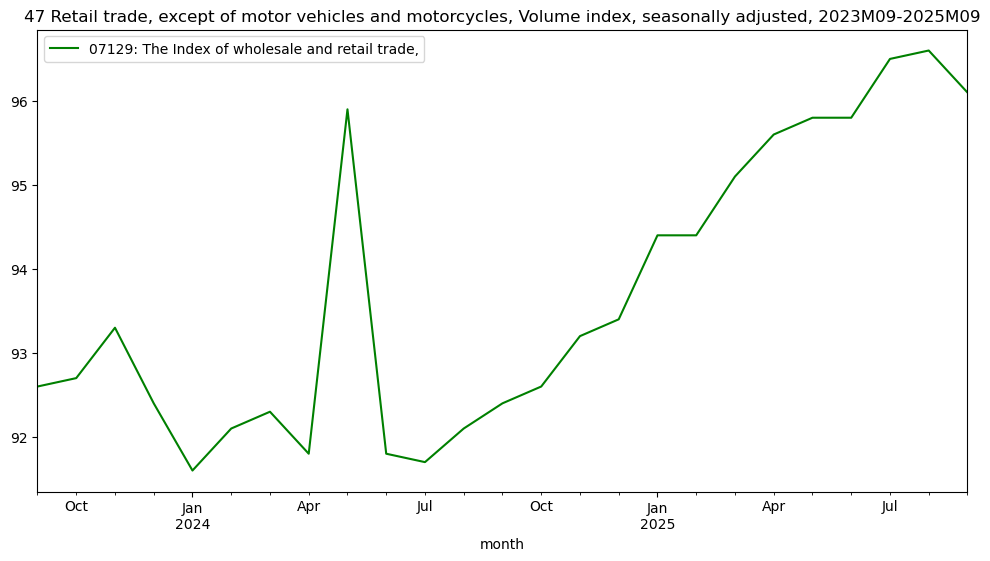

In [12]:
data.plot(x='month', y='07129: The Index of wholesale and retail trade,', figsize=(12, 6), color ='g', title = title)

*Information*: Until 2021, this was a separate, very simple index from SSB, the Retail Trade Index. It was good for simple examples. In 2022, the Retail Trade Index was expanded with more industry groups (45 and 46) and detailed with subgroups. The name of the StatBank table was changed to the The Index of wholesale and retail trade. 